In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the data

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [4]:
df['Type'].unique()

array([1, 2, 3])

In [5]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
df.describe().T

count        mean         std     min       25%      50%  \
Type             178.0    1.938202    0.775035    1.00    1.0000    2.000   
Alcohol          178.0   13.000618    0.811827   11.03   12.3625   13.050   
Malic            178.0    2.336348    1.117146    0.74    1.6025    1.865   
Ash              178.0    2.366517    0.274344    1.36    2.2100    2.360   
Alcalinity       178.0   19.494944    3.339564   10.60   17.2000   19.500   
Magnesium        178.0   99.741573   14.282484   70.00   88.0000   98.000   
Phenols          178.0    2.295112    0.625851    0.98    1.7425    2.355   
Flavanoids       178.0    2.029270    0.998859    0.34    1.2050    2.135   
Nonflavanoids    178.0    0.361854    0.124453    0.13    0.2700    0.340   
Proanthocyanins  178.0    1.590899    0.572359    0.41    1.2500    1.555   
Color            178.0    5.058090    2.318286    1.28    3.2200    4.690   
Hue              178.0    0.957449    0.228572    0.48    0.7825    0.965   
Dilution         178.0    2.611685    0.709990    1.27    1.9375    2.780   
Proline          178.0  746.893258  314.907474  278.00  500.5000  673.500   

                      75%      max  
Type               3.0000     3.00  
Alcohol           13.6775    14.83  
Malic              3.0825     5.80  
Ash                2.5575     3.23  
Alcalinity        21.5000    30.00  
Magnesium        107.0000   162.00  
Phenols            2.8000     3.88  
Flavanoids         2.8750     5.08  
Nonflavanoids      0.4375     0.66  
Proanthocyanins    1.9500     3.58  
Color              6.2000    13.00  
Hue                1.1200     1.71  
Dilution           3.1700     4.00  
Proline          985.0000  1680.00

### Histograms

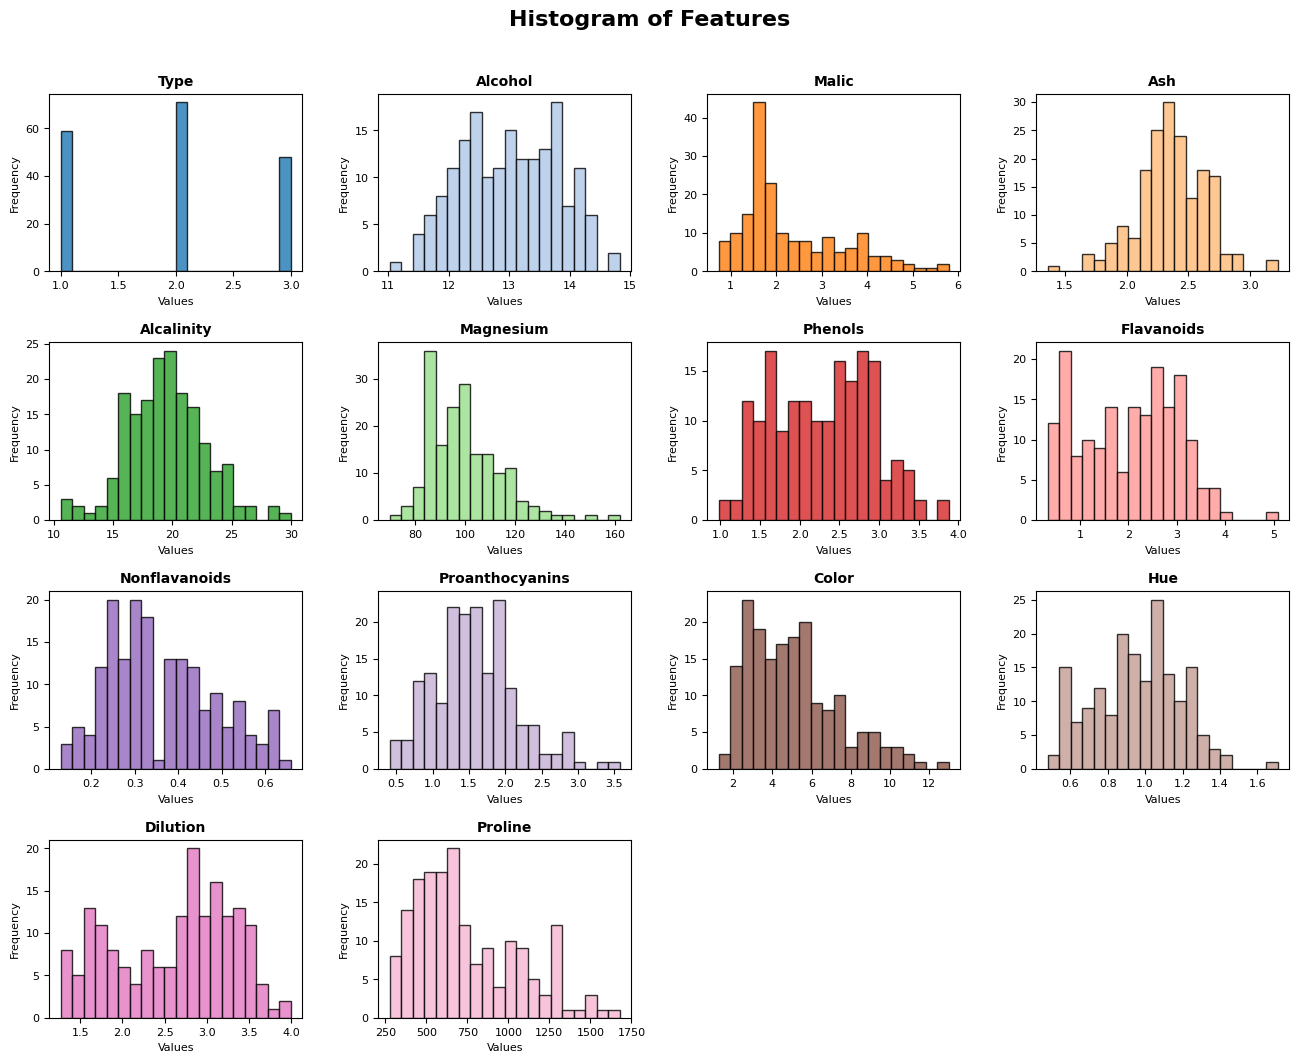

In [9]:
rows, cols = 4, 4
colors = plt.cm.tab20.colors
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, feature in enumerate(df.columns):
    row, col = divmod(i, cols)
    ax = axes[row, col]
    ax.hist(df[feature], bins=20, color=colors[i % len(colors)], alpha=0.8, edgecolor='black')
    ax.set_title(feature, fontsize=10, fontweight='bold')
    ax.set_xlabel('Values', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)

for j in range(len(df.columns), rows * cols):
    fig.delaxes(axes.flatten()[j])

fig.suptitle('Histogram of Features', fontsize=16, fontweight='bold', y=0.95)
plt.show()


### Histogram Plots

**Feature Distributions:**
- **Alcohol, Phenols, Alkalinity:** Normal distributions with slight variations.
- **Magnesium:** Concentrated between 60–150, indicating low variance.
- **Proline, Dilution:** Highly dispersed, requiring careful handling.

### Insights:
- Features like **Magnesium** have less variability.
- Features like **Dilution** and **Proline** may require scaling or outlier handling.

---

### KDE plots

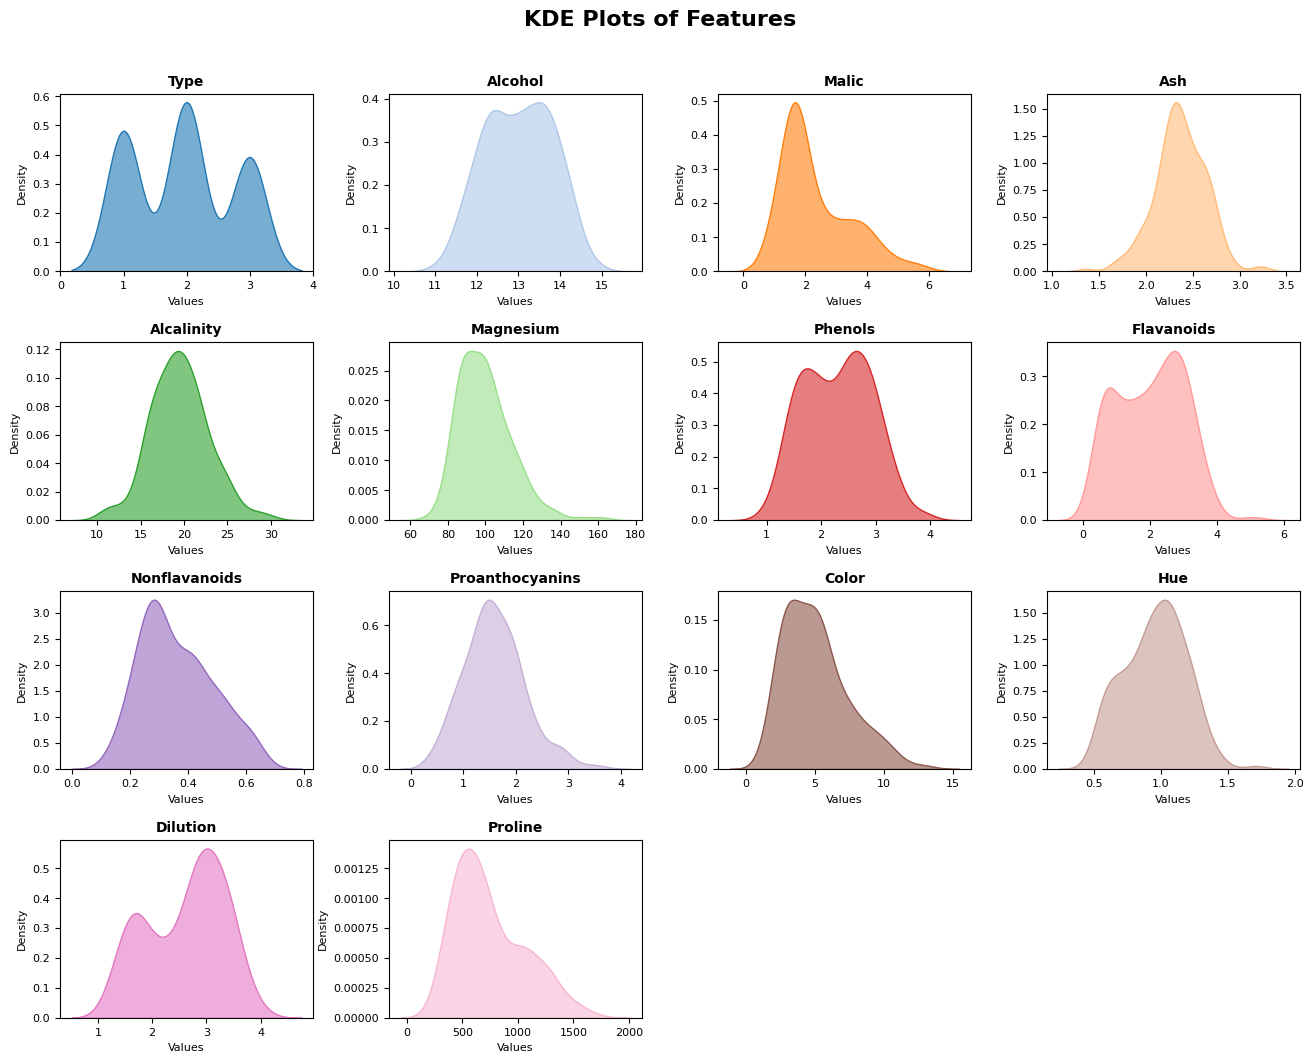

In [10]:
rows, cols = 4, 4
colors = plt.cm.tab20.colors
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, feature in enumerate(df.columns):
    row, col = divmod(i, cols)
    ax = axes[row, col]
    sns.kdeplot(df[feature], ax=ax, color=colors[i % len(colors)], fill=True, alpha=0.6)
    ax.set_title(feature, fontsize=10, fontweight='bold')
    ax.set_xlabel('Values', fontsize=8)
    ax.set_ylabel('Density', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)

for j in range(len(df.columns), rows * cols):
    fig.delaxes(axes.flatten()[j])

fig.suptitle('KDE Plots of Features', fontsize=16, fontweight='bold', y=0.95)
plt.show()

### KDE (Kernel Density Estimation) Plots

**Skewness:**
- **Malic, Proline, Dilution:** Right-skewed distributions, indicating outliers or high variance.
- **Nonflavanoids, Proanthocyanins:** Left-skewed, indicating concentrated low values.

**Bimodal Distributions:**
- **Type, Phenols:** Multiple peaks, suggesting distinct sub-groups.

### Insights:
- Skewed features may need normalization or log transformations for better model performance.
- Features with multiple peaks (e.g., **Type**) suggest possible categorical segmentation.

---

### PairPlot

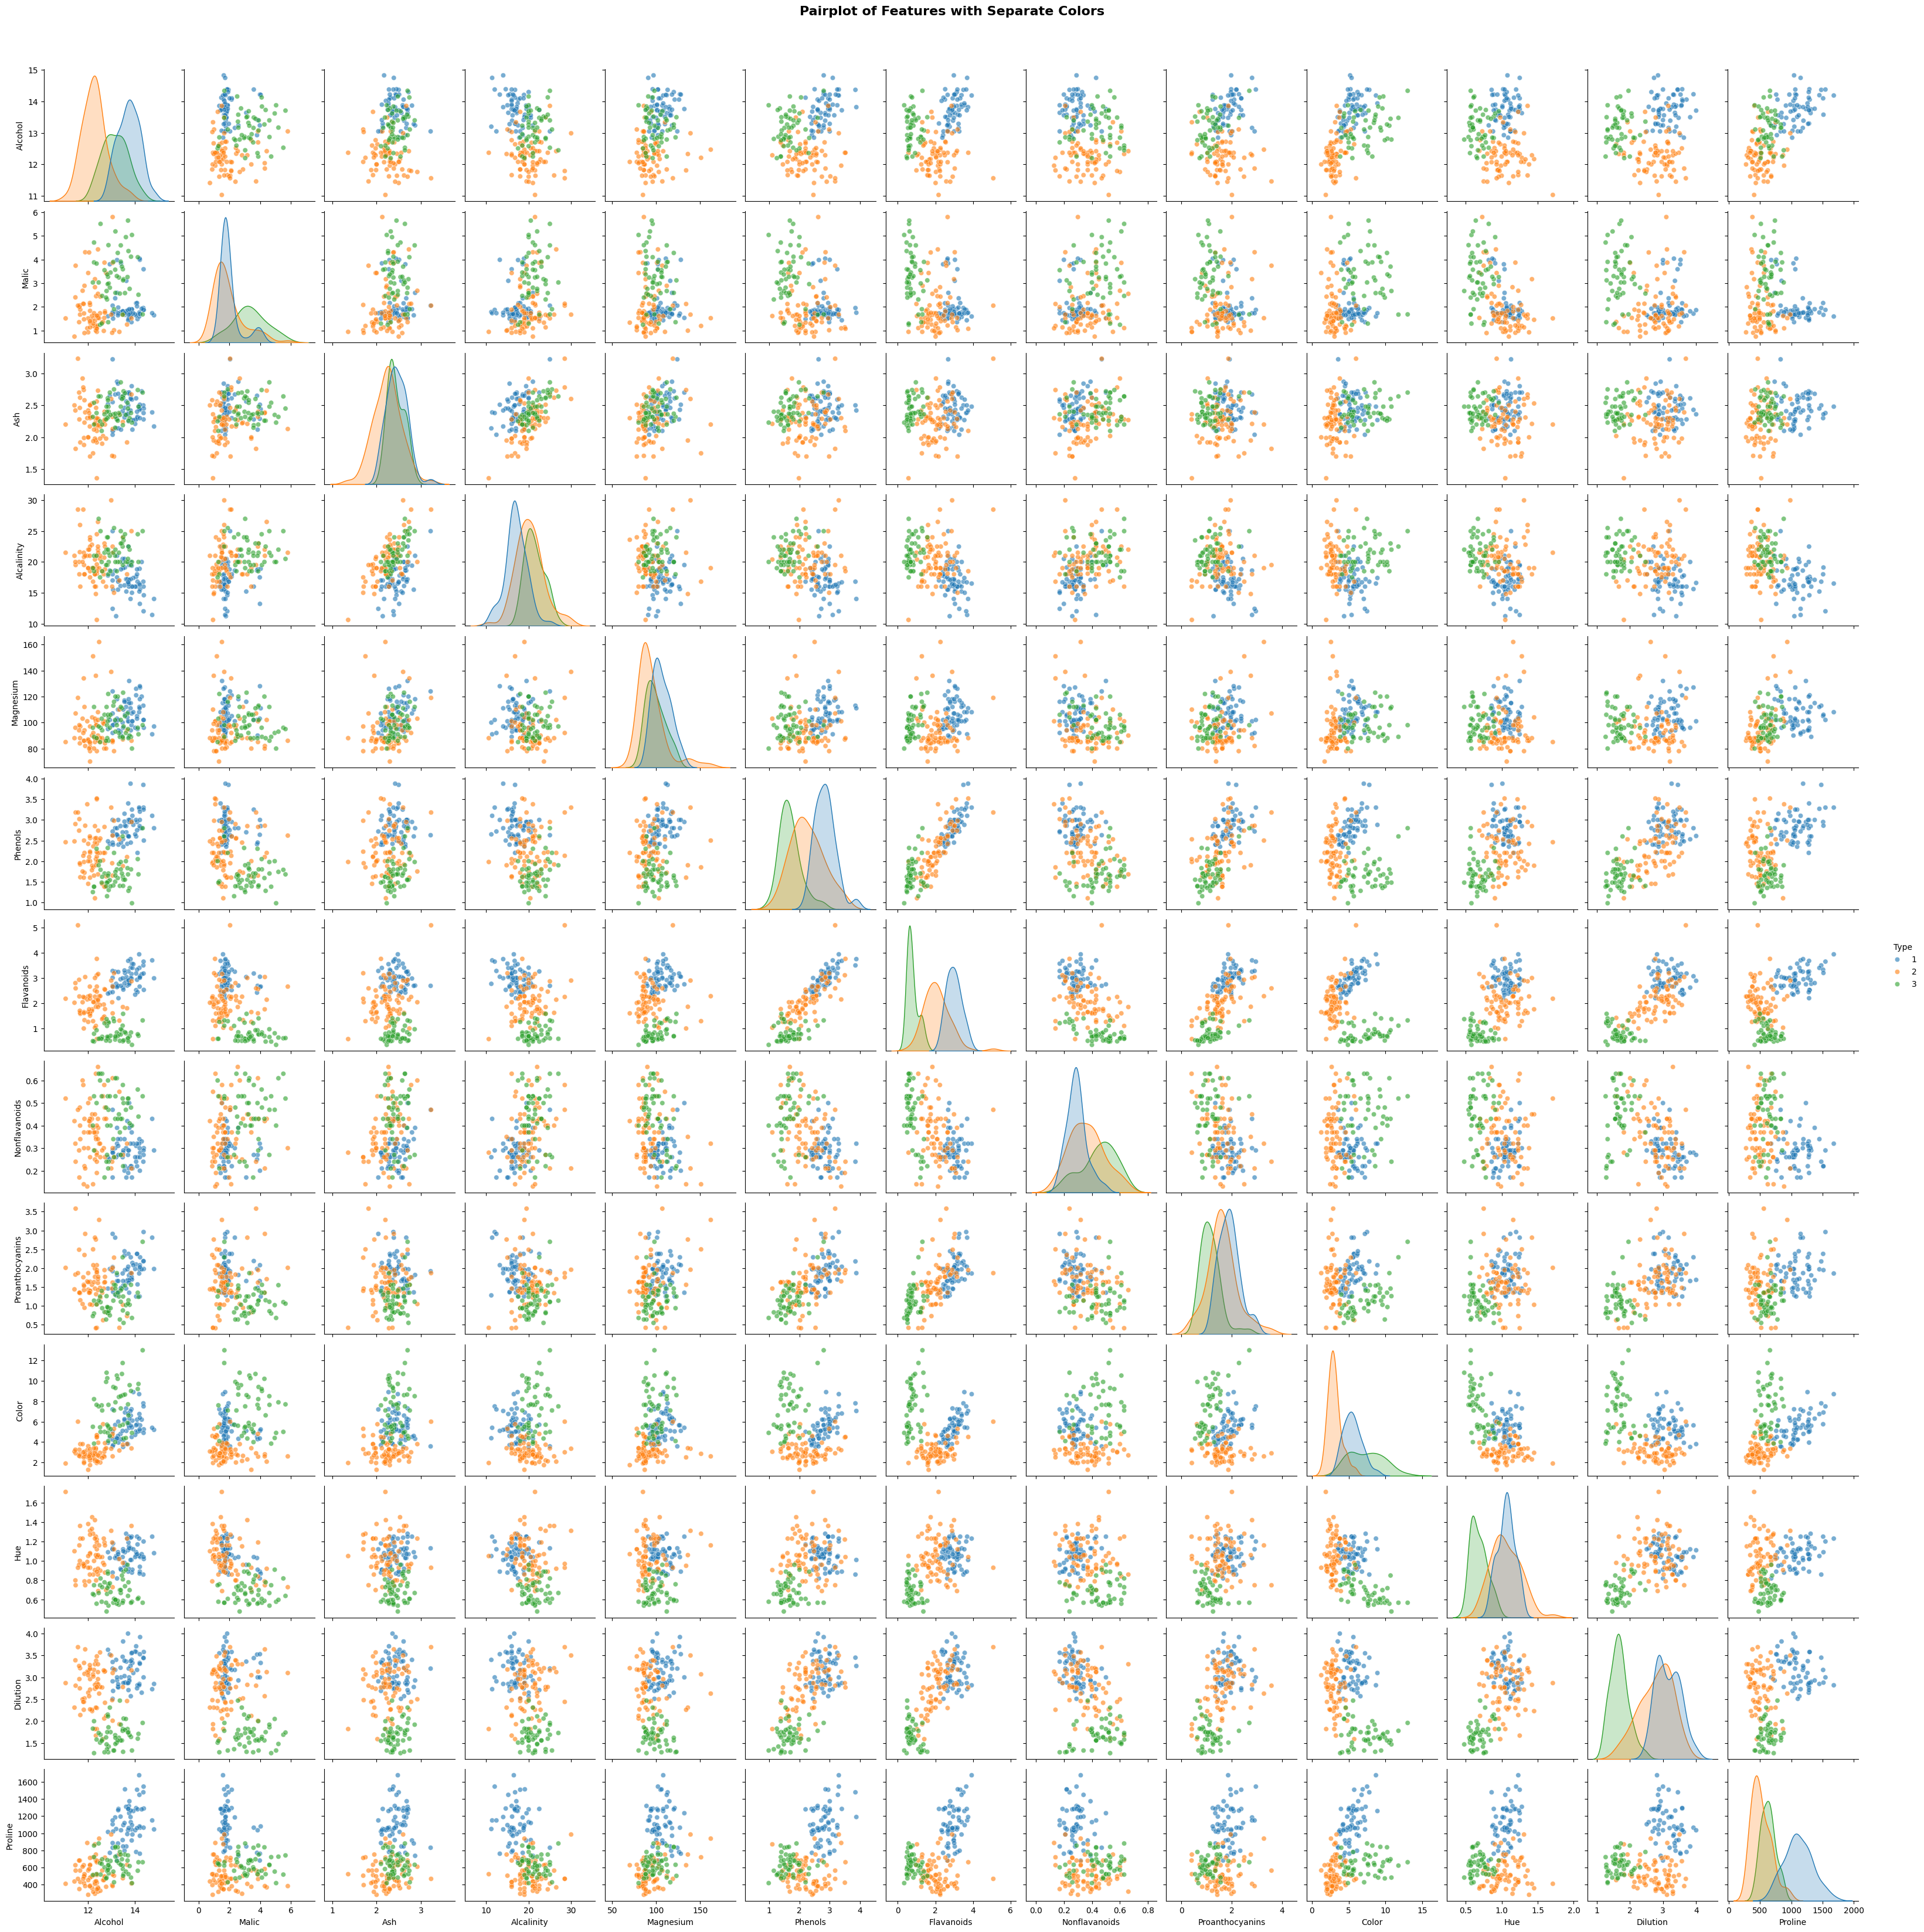

In [12]:
sns.pairplot(df, diag_kind='kde', hue='Type', palette="tab10", plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Features with Separate Colors', fontsize=16, fontweight='bold', y=1.02)
plt.show()

### Box Plot

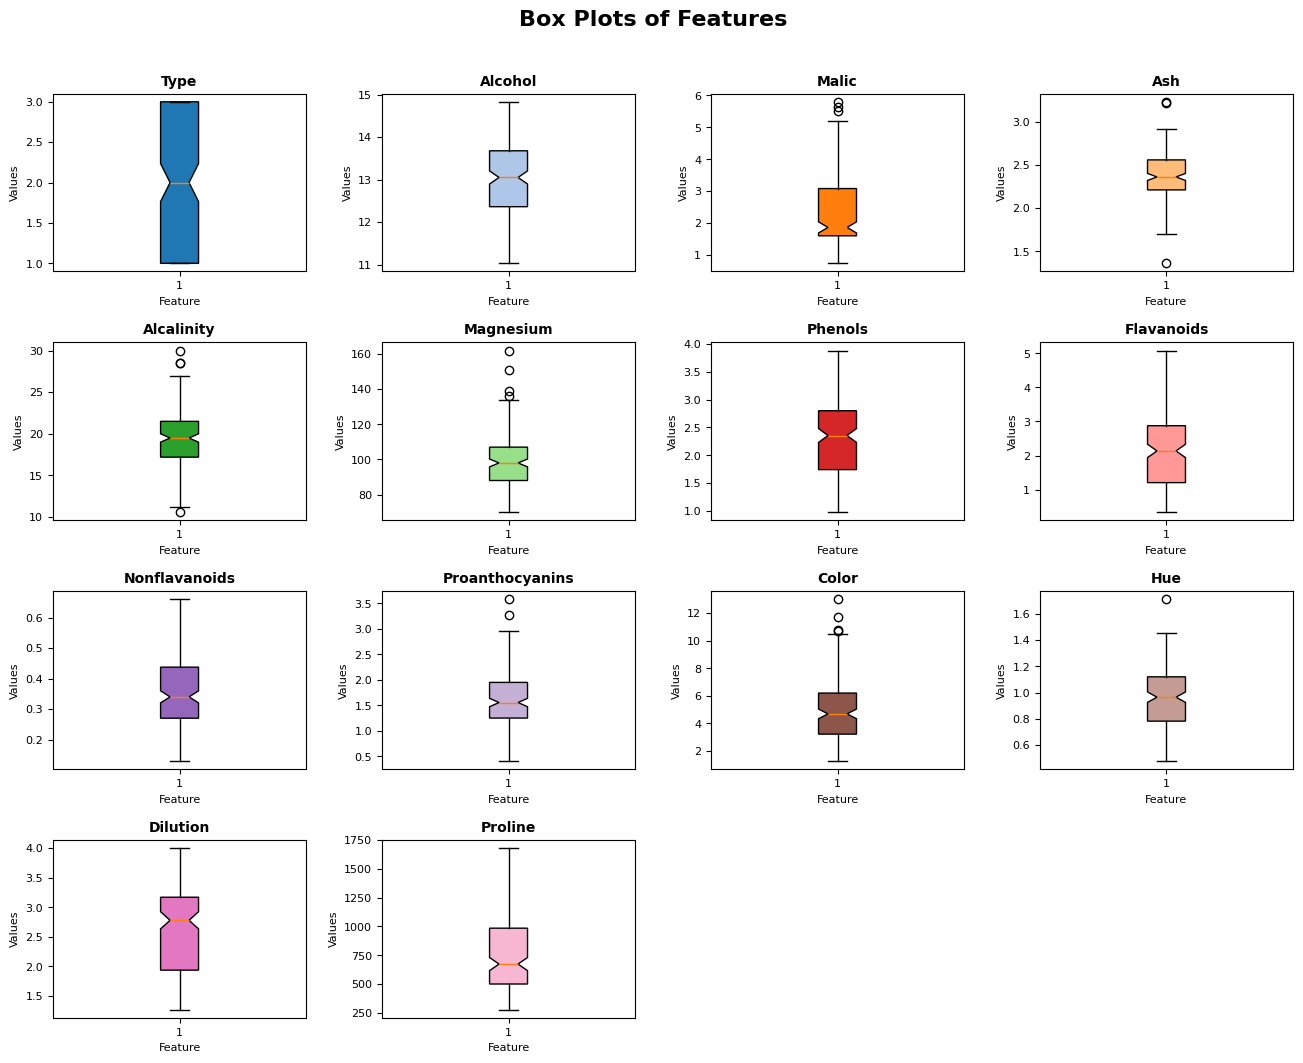

In [13]:
rows, cols = 4, 4
colors = plt.cm.tab20.colors
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, feature in enumerate(df.columns):
    row, col = divmod(i, cols)
    ax = axes[row, col]
    box = ax.boxplot(df[feature], patch_artist=True, notch=True)
    for patch in box['boxes']:
        patch.set_facecolor(colors[i % len(colors)])
    ax.set_title(feature, fontsize=10, fontweight='bold')
    ax.set_xlabel('Feature', fontsize=8)
    ax.set_ylabel('Values', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)

for j in range(len(df.columns), rows * cols):
    fig.delaxes(axes.flatten()[j])

fig.suptitle('Box Plots of Features', fontsize=16, fontweight='bold', y=0.95)
plt.show()

### Heat Map

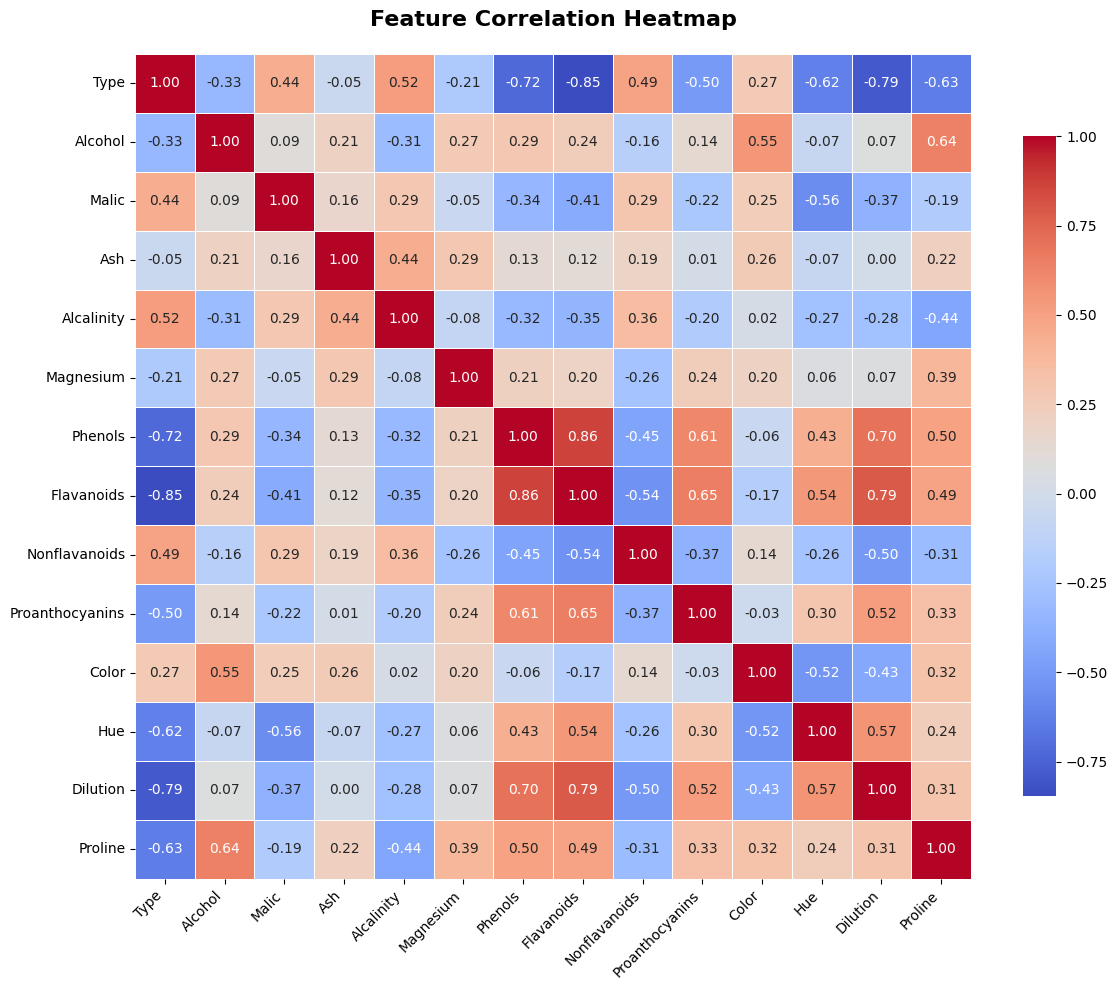

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    cbar_kws={'shrink': 0.8, 'orientation': 'vertical'}
)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

### Heatmap of Correlation

**Strong Positive Correlation:**
- **Phenols and Flavanoids (0.86):** Strong association, indicating an increase in phenols correlates with flavanoids.
- **Dilution and Proline (0.79):** High correlation suggests a direct relationship.
- **Proanthocyanins and Phenols (0.61):** Moderate positive correlation.

**Strong Negative Correlation:**
- **Type and Flavanoids (-0.85):** Inverse relationship between type and flavanoids.
- **Type and Dilution (-0.79):** Strong negative correlation.
- **Hue and Type (-0.62):** Hue decreases as 'Type' changes.

### Insights:
- Features like **Flavanoids**, **Phenols**, and **Dilution** are crucial due to their strong correlation with other features, making them significant for further analysis.

---